# Introduction to Python and Libraries
This notebook demonstrates:
- Setting up Python with NumPy, Pandas, Scikit-Learn
- Loading and exploring a dataset
- Basic data manipulation
- Building a linear regression model
- Plotting the regression line
- Evaluating model performance

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Load Dataset

In [4]:
data = pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Basic Data Exploration

In [5]:
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Basic Data Manipulation

In [6]:
# Remove missing values
data = data.dropna()

# Convert categorical columns if needed
data = pd.get_dummies(data, drop_first=True)

data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,True
1,4,82,4,2,65.0,False
2,8,51,7,2,45.0,True
3,5,52,5,2,36.0,True
4,7,75,8,5,66.0,False


## Prepare Data for Regression

In [7]:
# Assume last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear Regression Model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Make Predictions

In [9]:
y_pred = model.predict(X_test)
y_pred[:5]

array([0.34337102, 0.4227506 , 0.43525783, 0.37823393, 0.42699805])

## Evaluate Model

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.2437703301493136
R2 Score: 0.024839691417750553


## Plot Regression Line (using first feature)

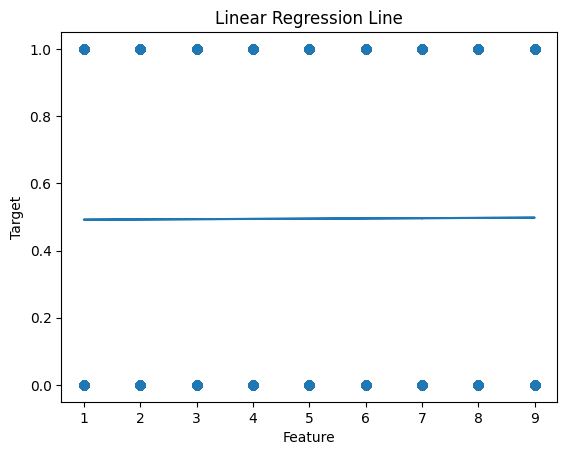

In [11]:
# Use only first feature for visualization
X_vis = X.iloc[:, 0].values.reshape(-1, 1)
y_vis = y.values

model_vis = LinearRegression()
model_vis.fit(X_vis, y_vis)
y_line = model_vis.predict(X_vis)

plt.figure()
plt.scatter(X_vis, y_vis)
plt.plot(X_vis, y_line)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Line')
plt.show()

## Conclusion
We successfully:
- Loaded and explored data
- Performed basic preprocessing
- Built and evaluated a regression model
- Visualized the regression line